# Tugas Besar 2A - Pembelajaran Mesin


#### Anggota Kelompok
1. Ahmad Mutawalli - 13517026, K02
2. Harry Rahmadi Munly - 13517033, K03
3. Ardysatrio Fakhri Haroen - 13517062, K02
4. Dandi Agus Maulana - 13517077, K02

## Import Dependencies

In [85]:
import sys
import random
import copy
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import fowlkes_mallows_score,silhouette_score 
from sklearn import decomposition

## Implementasi modul K-means

In [261]:
class Kmeans():
    def __init__(self, cluster=4, max_iter=10):
        self.cluster = cluster
        self.max_iter = max_iter
        self.stop_iter = 0
        self.num_data = 0
        self.num_feature = 0
        self.kmeans_centroids = []
    
    # Init centroids
    def init_centroid(self, data):
        self.num_data, self.num_feature = np.shape(data)
        centroids = np.zeros((self.cluster, self.num_feature))
        for i in range(self.cluster):
            centroid = data[np.random.choice(range(self.num_data))]
            centroids[i] = centroid
        return centroids

    #calculate euclidean distance
    def euclidean_distance (self, p1, p2):
        sum_square = 0
        for i in range(0, len(p1)):
            sum_square += math.pow(float(p1[i]) - float(p2[i]), 2)
        return float(math.sqrt(sum_square))
    

    # get closer centroid from a point
    def get_closest_centroid(self, point, centroids):
        index = -1
        min_dist = 999999.0
        for i, centroid in enumerate(centroids):
            distance = self.euclidean_distance(point, centroid)
            if distance < min_dist:
                index = i
                min_dist = distance
        return index

    def assign_cluster(self, centroids, data):
        clusters = [[] for i in range(self.cluster)]
        for idx, value in enumerate(data):
            closest_centroid = self.get_closest_centroid(value, centroids)
            clusters[closest_centroid].append(idx)
        return clusters

    # make new centroids with the means of data in each cluster
    def make_new_centroids(self, clusters, data):
        centroids = np.zeros((self.cluster, self.num_feature))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(data[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # get label of data
    def get_cluster_labels(self, clusters, data):
        label = np.zeros(np.shape(data)[0])
        for idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                label[sample_idx] = idx
        return label

    def check_change(self, data1, data2):
        change = False
        for i in range (len(data1)):
            if(not change):
                for j in range(len(data1[i])):
                    if (data1[i][j] != data2[i][j]):
                        change = True
                        break
        return change
    
    # run k-means clustering and return the centroids of the clusters
    def fit(self, data):
        # Init centroids
        centroids = self.init_centroid(data)

        # Iterate until convergence or reach max iter
        for i in range(self.max_iter):
            # Assign data to closest centroids (create clusters)
            clusters = self.assign_cluster(centroids, data)
            prev_centroids = centroids
            
            # Update centroids
            centroids = self.make_new_centroids(clusters, data)

            # break if no change 
            if (not self.check_change(prev_centroids, centroids)):
                self.stop_iter = i
                break

        self.kmeans_centroids = centroids
        return centroids

    # Predict the class of each sample
    def predict(self, data):
        
        clusters = self.assign_cluster(self.kmeans_centroids, data)

        predicted_labels = self.get_cluster_labels(clusters, data)

        return predicted_labels


## Clustering with K-means

In [262]:
#Load dataset iris
X_iris, y_iris = load_iris(return_X_y=True)
iris_data = pd.DataFrame(X_iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']); iris_data['label'] = y_iris
print(iris_data)

train_data = np.array(X_iris)
train_labels = np.array(y_iris)
num_features = train_data.data.shape[1]
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)

     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


In [293]:
kmean = Kmeans(cluster=num_classes, max_iter=1000)
print("Centroid :")
centroids = kmean.fit(train_data)
print(centroids)

print()
print("stop at iter : " + str(kmean.stop_iter))

print()
print("Predicted label :")
predicted_labels = kmean.predict(train_data)
print(predicted_labels)

# Calculate accuracy
Correct = 0
for index in range(len(train_labels)):
    current_label = train_labels[index]
    predicted_label = predicted_labels[index]
    if current_label == predicted_label:
        Correct += 1

Accuracy = Correct / len(train_labels)

print()
print("K-Means accuracy = ", Accuracy)

Centroid :
[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]

stop at iter : 5

Predicted label :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]

K-Means accuracy =  0.8866666666666667


## Evaluation

In [294]:
print("Fowlkes-Mallows Score : ",fowlkes_mallows_score(train_labels,predicted_labels))

Fowlkes-Mallows Score :  0.8112427991975698


In [295]:
print("Silhouette Score : ",silhouette_score(train_data,predicted_labels))

Silhouette Score :  0.5511916046195915


## Visualization

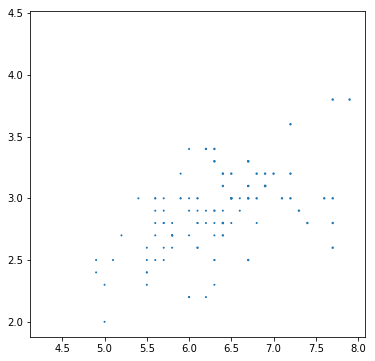

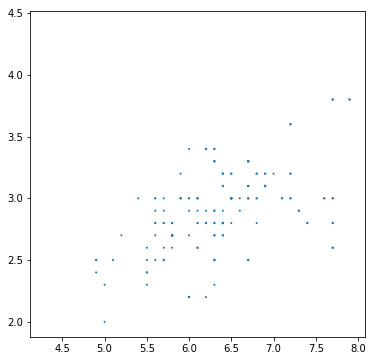

In [296]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['sepal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['sepal_width'],train_labels, cmap ='rainbow')
plt.show()

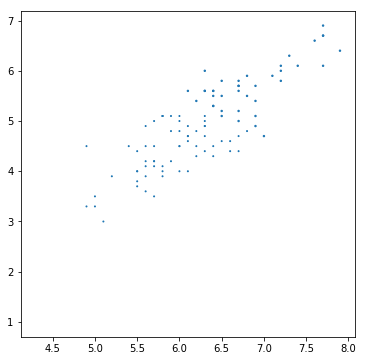

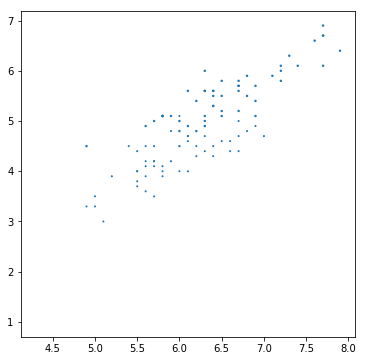

In [297]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_length'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_length'],train_labels, cmap ='rainbow')
plt.show()

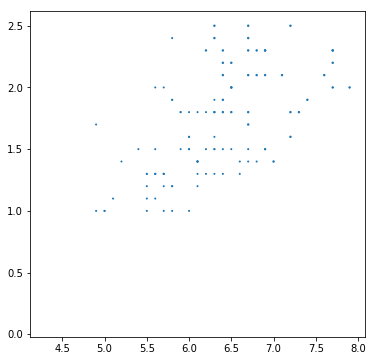

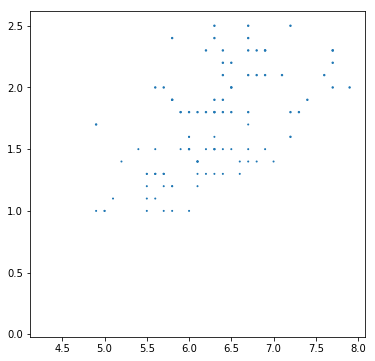

In [298]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_width'],train_labels, cmap ='rainbow')
plt.show()

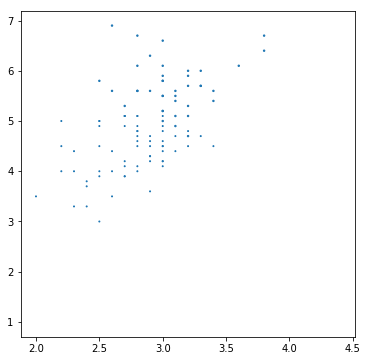

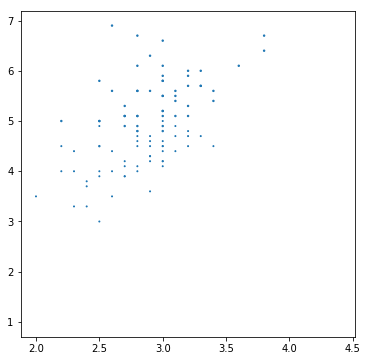

In [299]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_length'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_length'],train_labels, cmap ='rainbow')
plt.show()

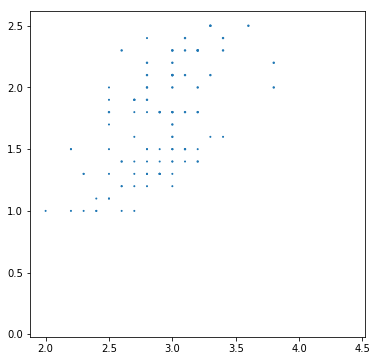

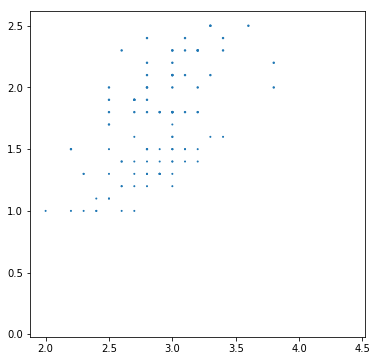

In [300]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_width'],train_labels, cmap ='rainbow')
plt.show()

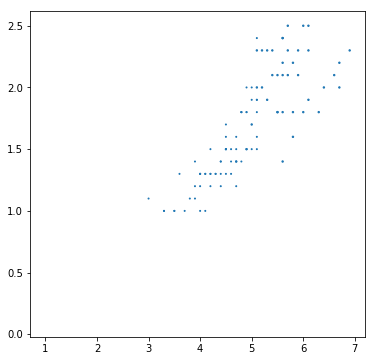

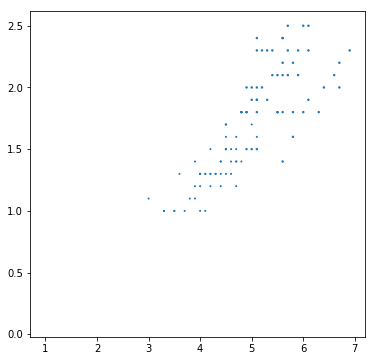

In [301]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],train_labels, cmap ='rainbow')
plt.show()